In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

In [438]:
df=pd.read_excel("C:\\Users\\ishav\\Downloads\\Papollo-Healtcare-Dataset.xlsx")

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7157 non-null   int64         
 1   Admit_Date               7157 non-null   datetime64[ns]
 2   Discharge_Date           7157 non-null   datetime64[ns]
 3   Diagnosis                7157 non-null   object        
 4   Bed_Occupancy            7157 non-null   object        
 5   Test                     7157 non-null   object        
 6   Doctor                   7157 non-null   object        
 7   Followup Date            7157 non-null   object        
 8   Feedback                 7157 non-null   float64       
 9   Billing Amount           7157 non-null   int64         
 10  Health Insurance Amount  7157 non-null   float64       
 11  month                    7157 non-null   int32         
 12  year                     7157 non-

In [598]:
print(df.describe())

         Patient_ID                     Admit_Date  \
count   7157.000000                           7157   
mean   27149.000000  2023-07-24 09:14:42.772111360   
min    23571.000000            2022-12-05 00:00:00   
25%    25360.000000            2023-04-03 00:00:00   
50%    27149.000000            2023-07-22 00:00:00   
75%    28938.000000            2023-11-11 00:00:00   
max    30727.000000            2024-03-06 00:00:00   
std     2066.192271                            NaN   

                      Discharge_Date     Feedback  Billing Amount  \
count                           7157  7157.000000     7157.000000   
mean   2023-08-01 15:14:27.681989376     4.723543    26607.891854   
min              2023-01-12 00:00:00     3.500000     1223.000000   
25%              2023-04-11 00:00:00     4.500000     5454.000000   
50%              2023-07-31 00:00:00     5.000000    12348.000000   
75%              2023-11-20 00:00:00     5.000000    43522.000000   
max              2024-03-07 00

In [778]:
df

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount,month,year,Patinets_stay_duration
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20 00:00:00,5.0,13234,11910.6,12,2022,12 days
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16 00:00:00,4.0,12241,11016.9,1,2023,8 days
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15 00:00:00,5.0,35255,31729.5,1,2023,7 days
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19 00:00:00,5.0,6582,5923.8,1,2023,7 days
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06 00:00:00,4.9,4567,4110.3,1,2023,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7152,29885,2024-03-03,2024-03-07,Typhoid,Private,Blood Test,Jay Sinha,2024-03-10 00:00:00,5.0,2342,2107.8,3,2024,4 days
7153,26517,2024-03-04,2024-03-07,Pneumonia,Private,CT Scan,Jaya Yaadav,2024-03-14 00:00:00,5.0,24943,22448.7,3,2024,3 days
7154,28201,2024-03-05,2024-03-07,Flu,General,Blood Test,Jay Sinha,00:00:00,3.5,2343,2108.7,3,2024,2 days
7155,24833,2024-03-06,2024-03-07,Typhoid,Private,X-Ray,Mark Joy,2024-03-15 00:00:00,4.9,3475,3127.5,3,2024,1 days


In [776]:
df["Patinets_stay_duration"]=df["Discharge_Date"]-df["Admit_Date"]

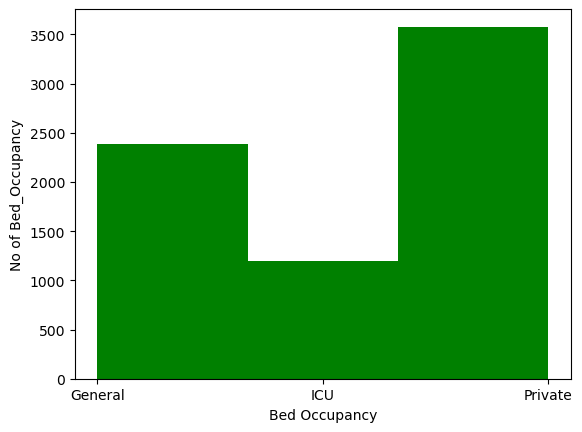

In [1105]:
plt.hist(df["Bed_Occupancy"],bins=3,color=["green"])
plt.xlabel("Bed Occupancy")
plt.ylabel("No of Bed_Occupancy")
plt.show()

In [462]:
df=df.drop(columns=["Unnamed: 11","Unnamed: 12"])

In [444]:
df_group_by=df.groupby("Bed_Occupancy")["Billing Amount"].sum().reset_index()
print(df_group_by)

  Bed_Occupancy  Billing Amount
0       General        63164925
1           ICU        40447981
2       Private        86819776


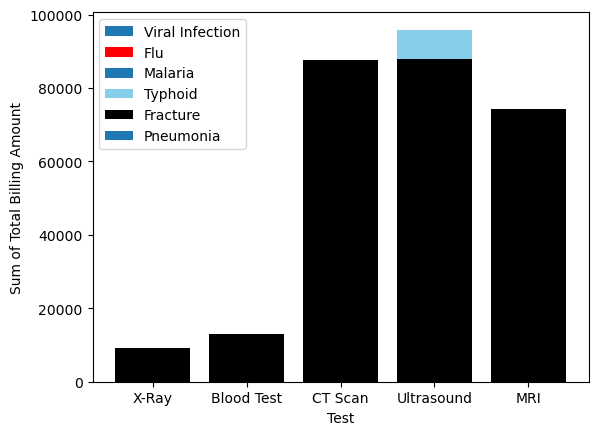

In [751]:
df_group_by=df.groupby("Test")["Billing Amount"].sum().reset_index()

color_map={
    "Viral Infection": "green",
    "Flu": "red",
    "Malaria": "white",
    "Typhoid": "skyblue",
    "Fracture": "black",
    "Pneumonia": "yellow"
}
for Diagnosis,col in color_map.items():
    df_dia=df[df["Diagnosis"]==Diagnosis]
    plt.bar(df_dia["Test"],df_dia["Billing Amount"],label=Diagnosis,color=col)

plt.legend()
plt.xlabel("Test")
df_group_by=df_group_by.sort_values(by="Billing Amount",ascending=False)
plt.ylabel("Sum of Total Billing Amount")
plt.show()

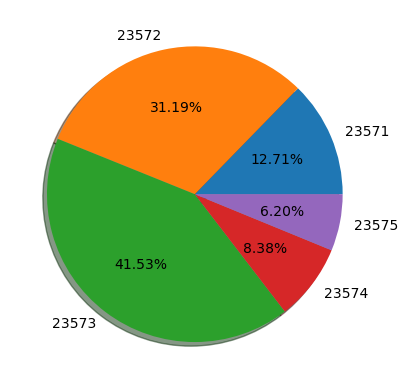

In [685]:
df_group_by_Patient_ID=(
    df.groupby("Patient_ID")["Health Insurance Amount"].sum().reset_index())
top3=df_group_by_Patient_ID.head(5)
plt.pie(top3["Health Insurance Amount"],labels=top3["Patient_ID"],autopct="%1.2f%%",shadow=True)
plt.show()

In [490]:
df["month"]=month=pd.to_datetime(df["Admit_Date"]).dt.month
df["year"]=month=pd.to_datetime(df["Admit_Date"]).dt.year

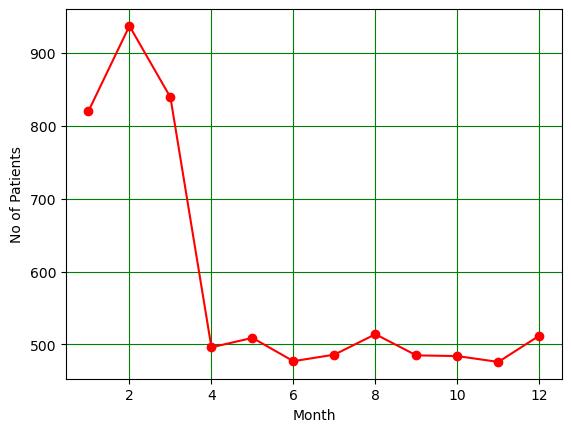

In [1099]:
number_of_patients_month=df.groupby("month")["Patient_ID"].count().reset_index()
plt.plot(
    number_of_patients_month["month"],number_of_patients_month["Patient_ID"],
    marker="o",color="red")
plt.xlabel("Month")
plt.ylabel("No of Patients")
plt.grid(color="green")
plt.show()

In [841]:
df

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount,month,year,Patinets_stay_duration
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20 00:00:00,5.0,13234,11910.6,12,2022,12 days
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16 00:00:00,4.0,12241,11016.9,1,2023,8 days
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15 00:00:00,5.0,35255,31729.5,1,2023,7 days
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19 00:00:00,5.0,6582,5923.8,1,2023,7 days
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06 00:00:00,4.9,4567,4110.3,1,2023,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7152,29885,2024-03-03,2024-03-07,Typhoid,Private,Blood Test,Jay Sinha,2024-03-10 00:00:00,5.0,2342,2107.8,3,2024,4 days
7153,26517,2024-03-04,2024-03-07,Pneumonia,Private,CT Scan,Jaya Yaadav,2024-03-14 00:00:00,5.0,24943,22448.7,3,2024,3 days
7154,28201,2024-03-05,2024-03-07,Flu,General,Blood Test,Jay Sinha,00:00:00,3.5,2343,2108.7,3,2024,2 days
7155,24833,2024-03-06,2024-03-07,Typhoid,Private,X-Ray,Mark Joy,2024-03-15 00:00:00,4.9,3475,3127.5,3,2024,1 days


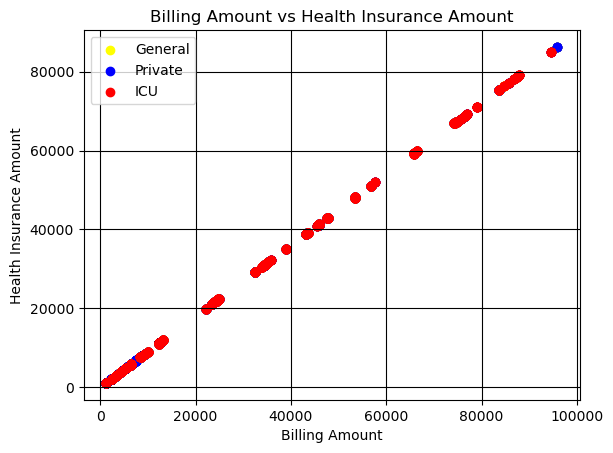

In [1097]:
try:
    color={"General":"yellow","Private":"Blue","ICU":"Red"}
    for bad_occupancy,color in color.items():
        df_deft=df[df["Bed_Occupancy"]==bad_occupancy]
        plt.scatter(df_deft["Billing Amount"],df_deft["Health Insurance Amount"],c=color,label=bad_occupancy)
    plt.legend()
    plt.xlabel("Billing Amount")
    plt.ylabel("Health Insurance Amount")
    plt.title("Billing Amount vs Health Insurance Amount")
    plt.grid(color="black")
    plt.show()
except:
    print(" ")

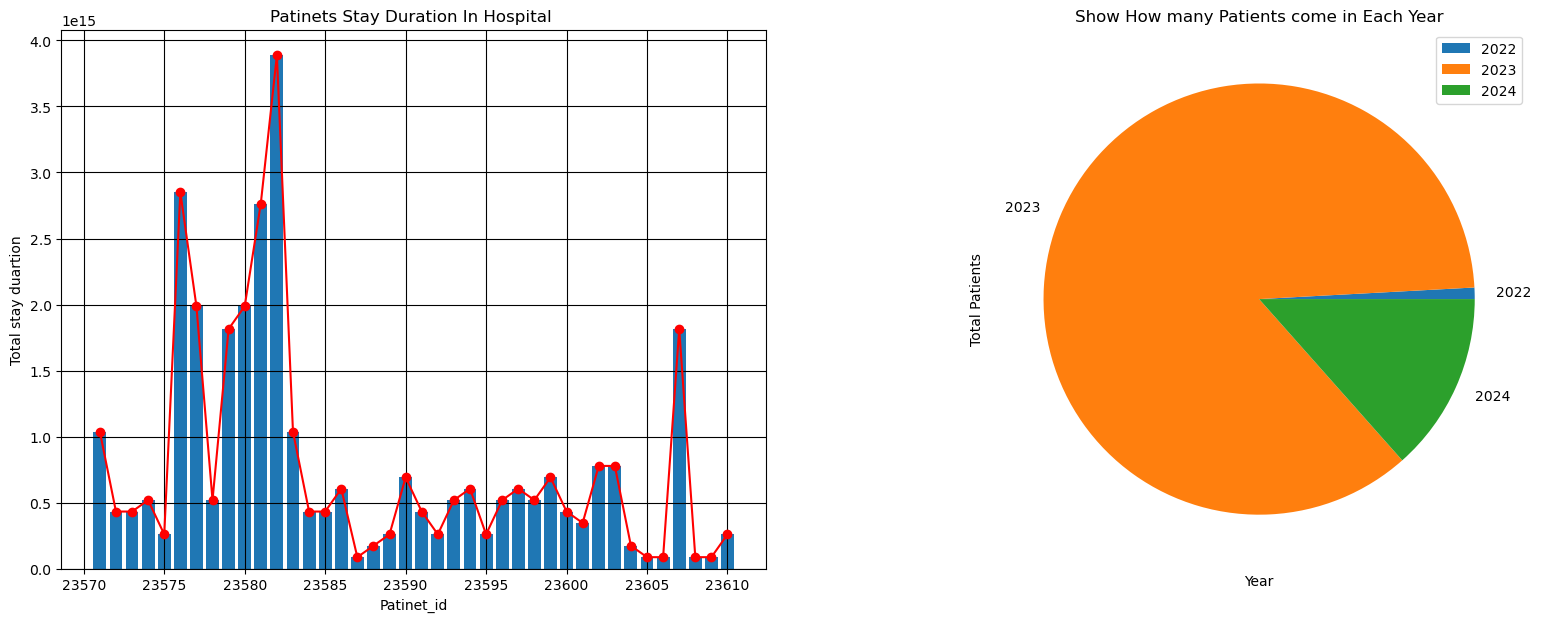

In [940]:
df_group_by=df.groupby("Patient_ID")["Patinets_stay_duration"].sum().reset_index()
Top_5=df_group_by.head(40)
fig,axs=plt.subplots(1,2,figsize=(20,7))
df_group_by=df_group_by.sort_values(by="Patient_ID",ascending=False)
axs[0].bar(Top_5["Patient_ID"],Top_5["Patinets_stay_duration"])
axs[0].plot(Top_5["Patient_ID"],Top_5["Patinets_stay_duration"],marker="o",color="Red")
axs[0].set_title("Patinets Stay Duration In Hospital ")
axs[0].set_xlabel("Patinet_id")
axs[0].set_ylabel("Total stay duartion")
axs[0].grid(color="black")

df_group_by_date=df.groupby("year")["Patient_ID"].sum().reset_index()
axs[1].pie(df_group_by_date["Patient_ID"],labels=df_group_by_date["year"],autopct="%1.2f%%",)
axs[1].legend()
axs[1].set_title("Show How many Patients come in Each Year")
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Total Patients")
axs[1].grid()
plt.show()

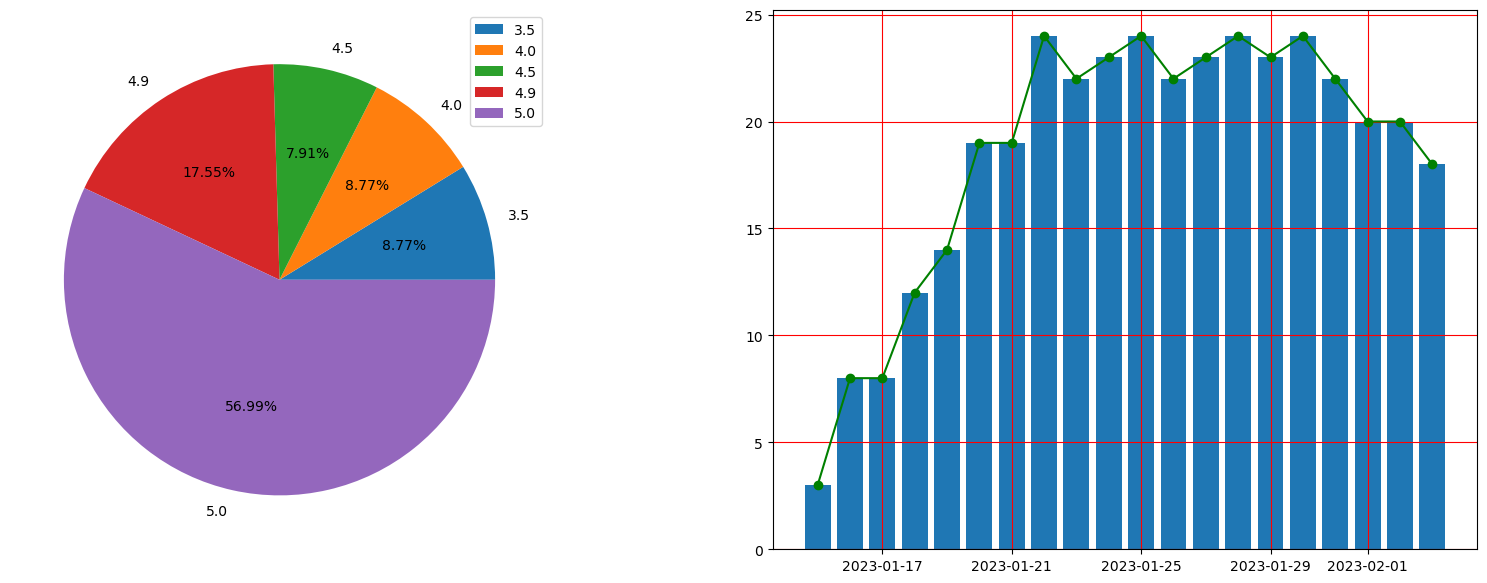

In [1085]:
fig,axis=plt.subplots(1,2,figsize=(20,7))
df_group_by_date=df.groupby("Feedback")["Doctor"].count().reset_index()

axis[0].pie(df_group_by_date["Doctor"],labels=df_group_by_date["Feedback"],autopct="%1.2f%%")
axis[0].legend()
axs[0].set_title("Top Doctors")
axs[0].set_xlabel("Rating")



df_group_by_followup_date=df.groupby("Follow_up_date")["Patient_ID"].count().reset_index()
top_5=df_group_by_followup_date.head(20)
axis[1].bar(top_5["Follow_up_date"],top_5["Patient_ID"])
axis[1].plot(top_5["Follow_up_date"],top_5["Patient_ID"],marker="o",color="green")
axis[1].grid(color="red")
axs[1].set_title("Patinets Stay Duration In Hospital ")
axs[1].set_xlabel("Patinet_id")
plt.show()